## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## Import Packages

In [186]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
import matplotlib.image as mpimg
import os
import glob
import math
%matplotlib inline

## Compute the camera calibration using chessboard images

In [187]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
# for fname in images:
#     img = cv2.imread(fname)
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#     # Find the chessboard corners
#     ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

#     # If found, add object points, image points
#     if ret == True:
#         objpoints.append(objp)
#         imgpoints.append(corners)

#         # Draw and display the corners
#         img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
#         cv2.imshow('img',img)
#         cv2.waitKey(200)

# cv2.destroyAllWindows()

## Calculate distortion coefficients and save paramter

In [188]:
# img = cv2.imread('./camera_cal/test_image.jpg')
# img_size = (img.shape[1], img.shape[0])
# print('This image is:', type(img), 'with dimensions:', img.shape)

# # Do camera calibration given object points and image points
# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

# # Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
# save_file = "./camera_cal/wide_dist_pickle.p"
# dist_pickle = {}
# dist_pickle["mtx"] = mtx
# dist_pickle["dist"] = dist
# pickle.dump( dist_pickle, open(save_file , "wb" ) )

## Restore distortion coefficients, and test undistortion on an image!

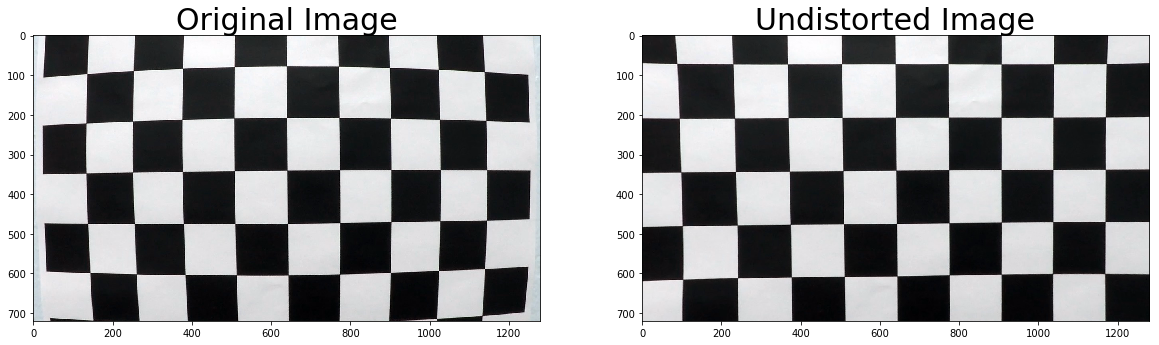

In [189]:
save_file = "./camera_cal/wide_dist_pickle.p"

with open(save_file, mode='rb') as f:
    dist_pickle = pickle.load(f)

mtx = dist_pickle["mtx"] 
dist = dist_pickle["dist"] 

# Test undistortion on an image
img = cv2.imread('./camera_cal/test_image.jpg')
img_size = (img.shape[1], img.shape[0])

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('./camera_cal/test_undist.jpg',dst)

#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

## List Images

In [190]:
os.listdir("test_images/")

['frame1041.jpg',
 'frame1139.jpg',
 'frame120.jpg',
 'frame133.jpg',
 'frame604.jpg',
 'frame72.jpg',
 'straight_lines1.jpg',
 'straight_lines2.jpg',
 'test1.jpg',
 'test2.jpg',
 'test3.jpg',
 'test4.jpg',
 'test5.jpg',
 'test6.jpg']

## Show Images

In [191]:
def show_images(images,lable=None,cols = 3,cmap=None):
    
    rows = (len(images)+cols-1)//cols 
    
    plt.figure(figsize=(14, 14))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        
        # use gray scale color map if there is only one channel   
        showimage_shape = image.shape
        
        if len(showimage_shape) == 2: 
            cmap = "gray"
        elif  showimage_shape[2] == 1:
            image = image[:,:,0]
            cmap = "gray"
        
        plt.imshow(image, cmap=cmap)
        if lable != None and lable[i] != None:
            plt.title(lable[i],fontsize=12)
#         plt.xticks([])
#         plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

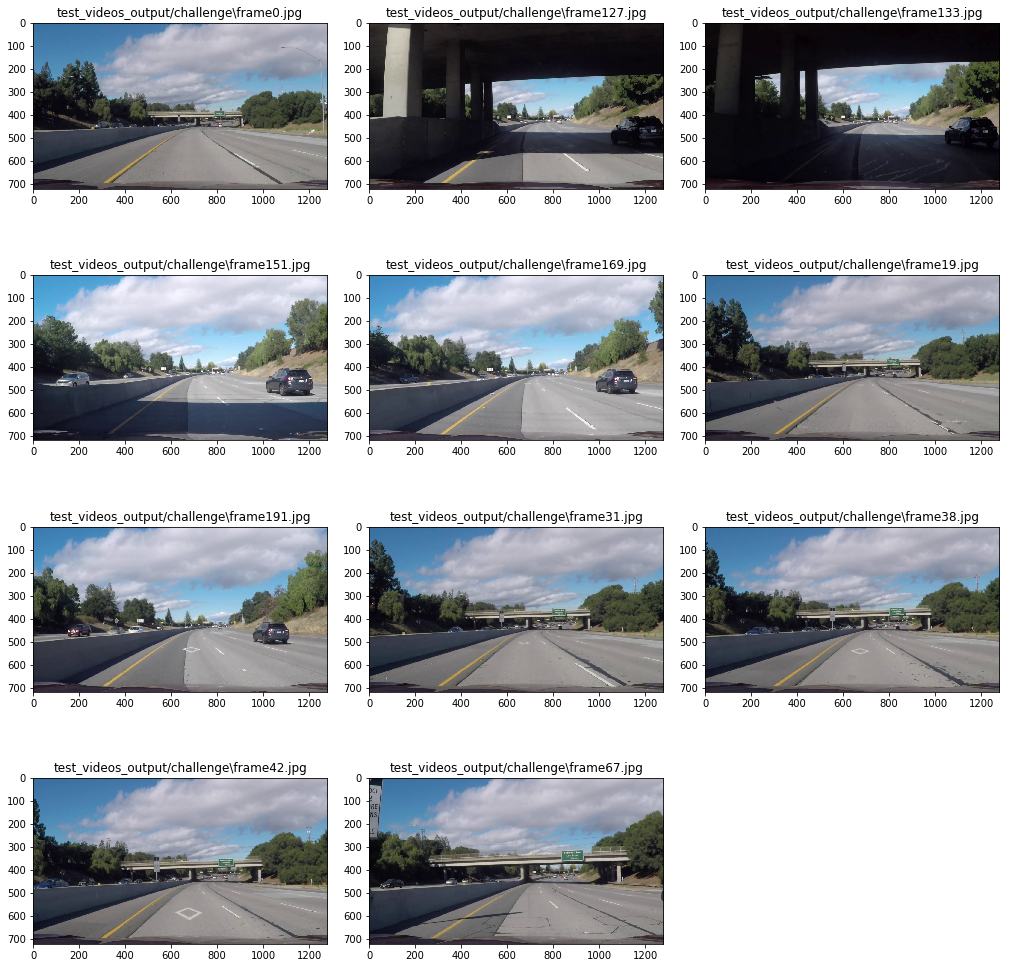

In [192]:
# read_images = [[plt.imread(path),path] for path in glob.glob('test_images/*.jpg')]
read_images = [[plt.imread(path),path] for path in glob.glob('test_videos_output/challenge/*.jpg')]


test_images = [s[0] for s in read_images]
test_images_label = [s[1] for s in read_images]

show_images(test_images,test_images_label)

## Undistort Images

In [193]:
def imageundistort(img,mtx=mtx,dist=dist):
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

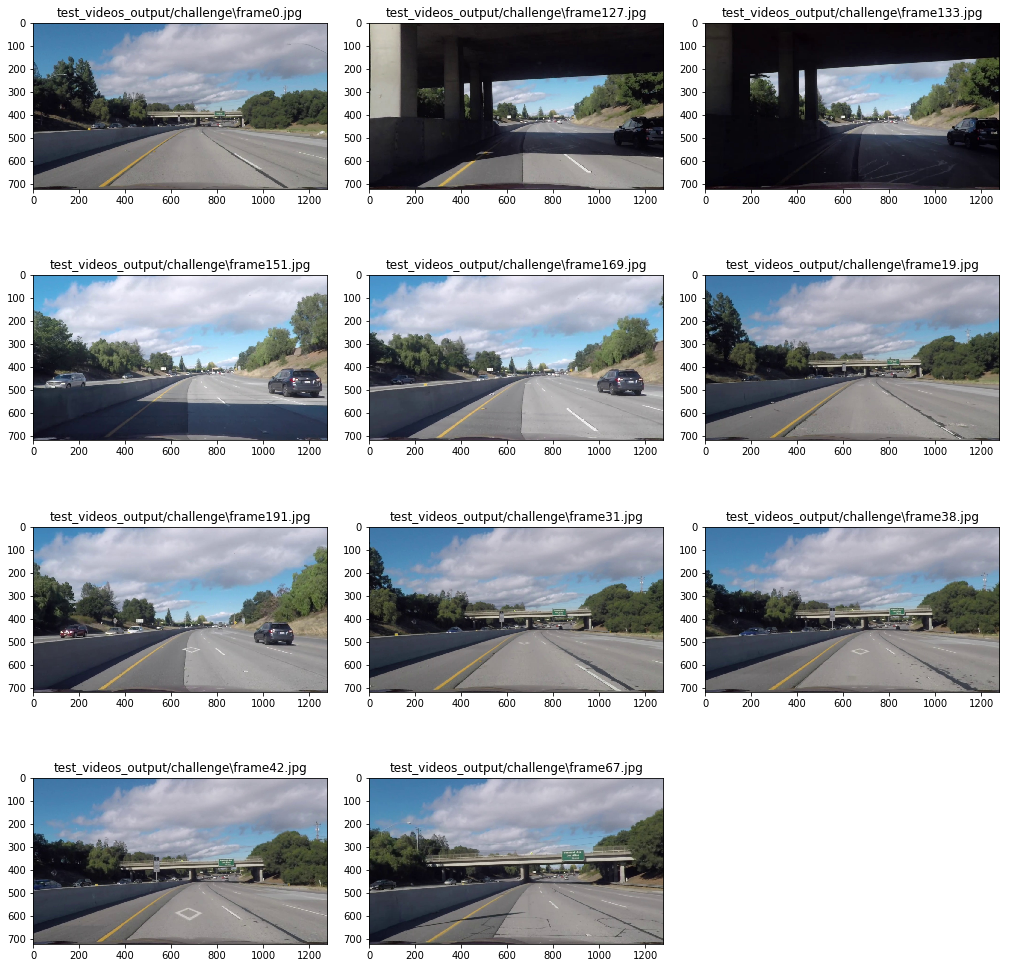

In [194]:
undistort_images = list(map(imageundistort, test_images))

show_images(undistort_images,test_images_label)

## Perspective Transformed View Point

In [195]:
# src = np.float32([[555,480],[735,480],[1120,720],[210,720]])
# dst = np.float32([[210,0],[1120,0],[1120,720],[210,720]])

src = np.float32([[525,500],[765,500],[1120,720],[210,720]])
dst = np.float32([[210,0],[1120,0],[1120,720],[210,720]])


def warp(img,src=src,dst=dst):
    img_size = (img.shape[1],img.shape[0])
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

print("source view point")
print(src)
print("Transformed view point")
print(dst)

source view point
[[  525.   500.]
 [  765.   500.]
 [ 1120.   720.]
 [  210.   720.]]
Transformed view point
[[  210.     0.]
 [ 1120.     0.]
 [ 1120.   720.]
 [  210.   720.]]


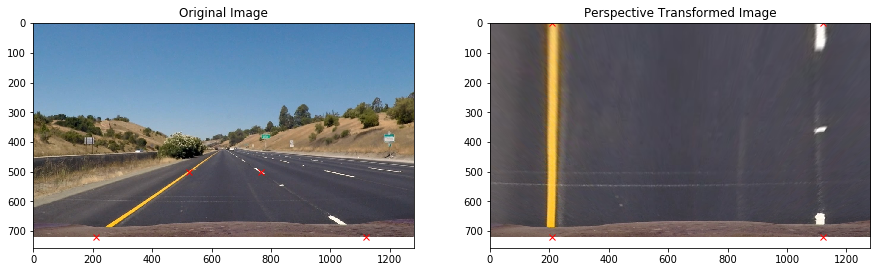

In [196]:
#reading in an image
straightimage = mpimg.imread('test_images/straight_lines1.jpg')

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(straightimage) 
plt.plot(src[:,0], src[:,1], 'rx')
plt.title('Original Image')

plt.subplot(1, 2, 2)
warpstraightimage = warp(straightimage)
plt.imshow(warpstraightimage) 
plt.plot(dst[:,0], dst[:,1], 'rx')
plt.title('Perspective Transformed Image')

## Lane marked Perspective Transform 

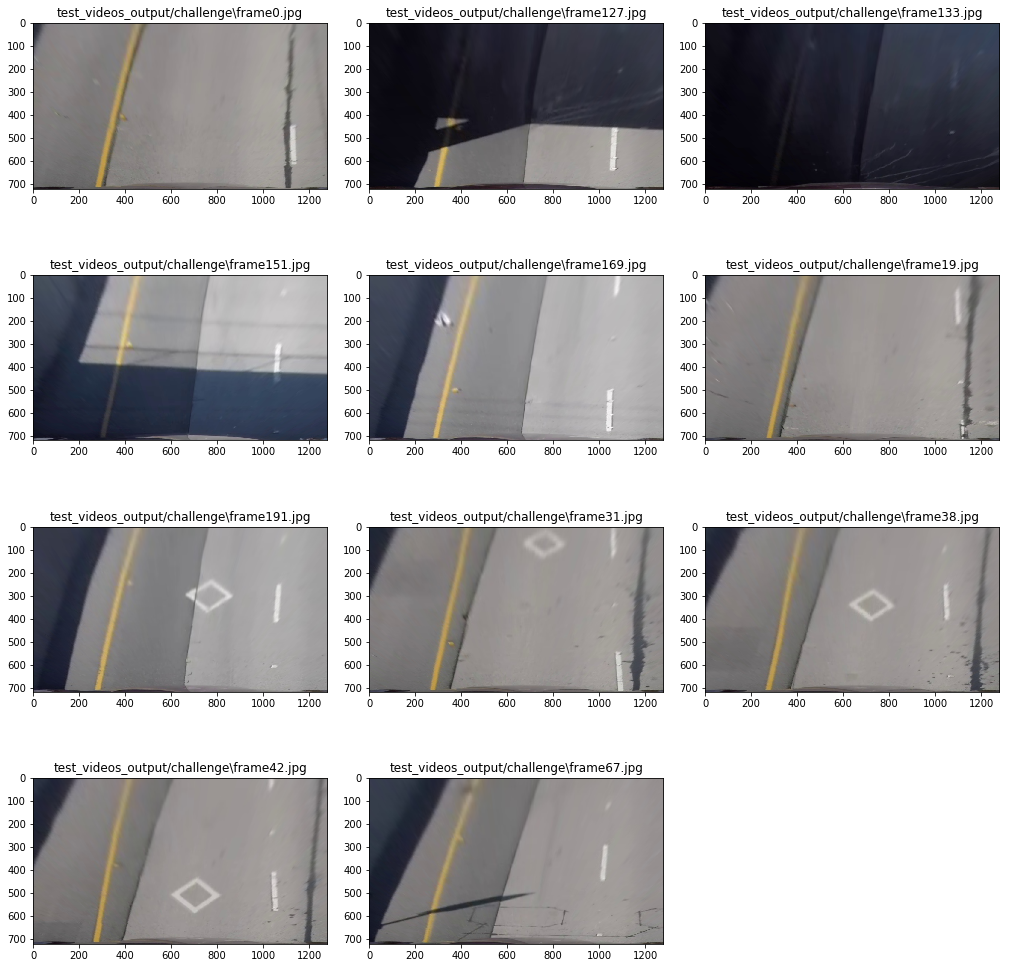

In [197]:
warp_images = list(map(warp, undistort_images))

show_images(warp_images,test_images_label)

## HSL HSV Lab Channel Show

In [198]:
def channelsplit(img):
    channel_images=[]
    channel_images_label=[]
    
    #origin image
    channel_images.append(img)
    channel_images_label.append('Original Image')
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    channel_images.append(gray)
    channel_images_label.append('gray Image')  
    
    grayequalizeHist = cv2.equalizeHist(gray)
    channel_images.append(grayequalizeHist)
    channel_images_label.append('equalizeHist gray Image') 
    
    #HLS image
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    h = hls[:,:,0]
    l = hls[:,:,1]
    s = hls[:,:,2]
    channel_images.append(h)
    channel_images_label.append('HLS: H Channel Image') 
    channel_images.append(l)
    channel_images_label.append('HLS: L Channel Image') 
    channel_images.append(s)
    channel_images_label.append('HLS: S Channel Image') 
    
    #HSV image
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    v = hsv[:,:,2]
    channel_images.append(h)
    channel_images_label.append('HSV: H Channel Image') 
    channel_images.append(s)
    channel_images_label.append('HSV: S Channel Image') 
    channel_images.append(v)
    channel_images_label.append('HSV: V Channel Image') 
    
    #Lab image
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    l = lab[:,:,0]
    a = lab[:,:,1]
    b = lab[:,:,2]
    channel_images.append(l)
    channel_images_label.append('Lab: L Channel Image') 
    channel_images.append(a)
    channel_images_label.append('Lab: a Channel Image') 
    channel_images.append(b)
    channel_images_label.append('Lab: b Channel Image') 
    
    return channel_images,channel_images_label

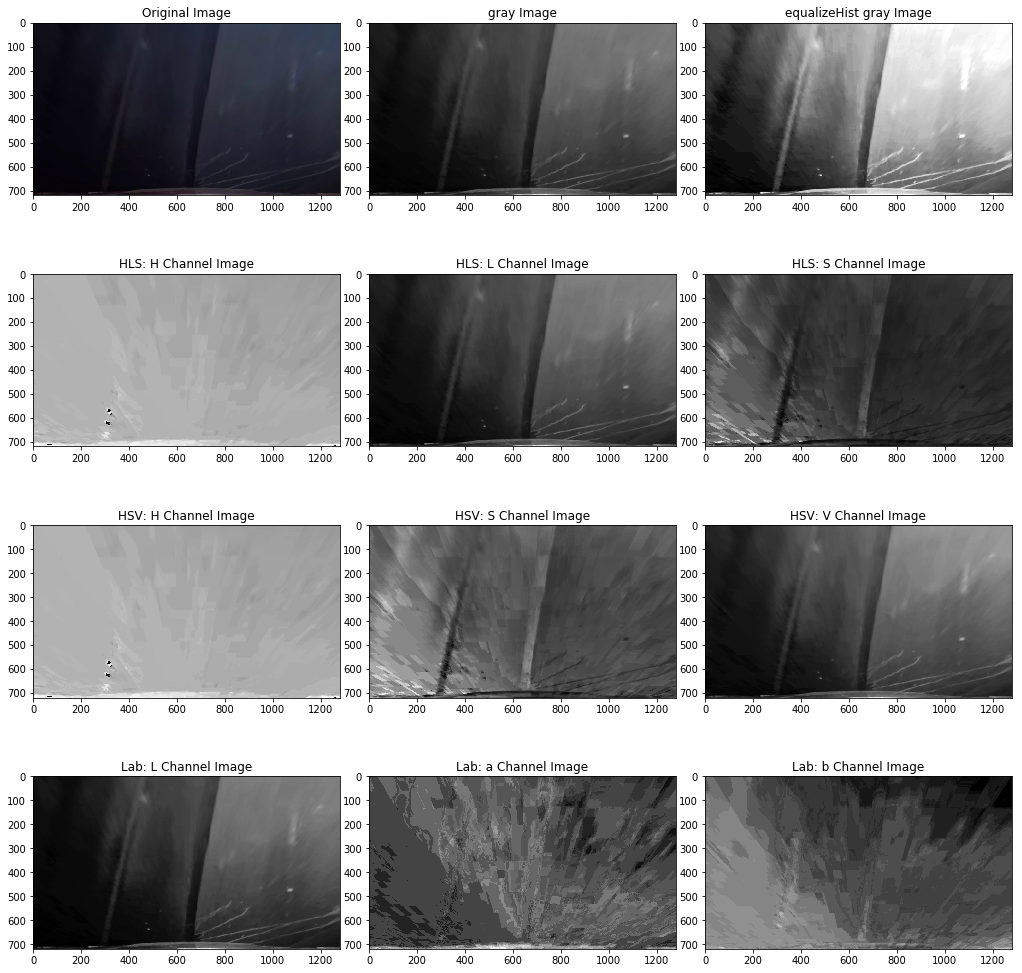

In [199]:
images,label = channelsplit(warp_images[2])

show_images(images,label)

## Lane Filted Images

In [200]:
# def sobel_thresh(img, orient='x',sobel_thresh=(20, 100)):
#     # Convert to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
#     # Apply x or y gradient with the OpenCV Sobel() function
#     # and take the absolute value
#     if orient == 'x':
#         abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0,ksize=5))
#     if orient == 'y':
#         abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1,ksize=5))
        
#     #Absolute x derivative to accentuate lines away from horizontal
#     scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
#     # Create a copy and apply the threshold
#     binary_output = np.zeros_like(scaled_sobel)
#     binary_output[(scaled_sobel >= sobel_thresh[0]) & (scaled_sobel <= sobel_thresh[1])] = 1

#     # Return the result
#     return binary_output

# def hsv_thresh(img, v_thresh=(220, 255)):

#     hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#     v_channel = hsv[:,:,2]
    
#     binary_output = np.zeros_like(v_channel)
#     binary_output[(v_channel >= v_thresh[0]) & (v_channel <= v_thresh[1])] = 1
    
#     return binary_output


# def pipeline(img):
#     sobel_thresh_bin = sobel_thresh(img)
#     hsv_thresh_bin = hsv_thresh(img)
    
#     color_binary = np.dstack(( np.zeros_like(sobel_thresh_bin), sobel_thresh_bin, hsv_thresh_bin)) 

#     combined_binary = np.zeros_like(sobel_thresh_bin)
#     combined_binary[ (sobel_thresh_bin == 1) | (hsv_thresh_bin == 1)] = 1
    
#     return combined_binary

In [232]:
def gamma_correction(img, correction=0.4):
    """"
    Gamma correction function
    
    """
    img = img/255.0
    img = cv2.pow(img, correction)
    return np.uint8(img*255)

def sobel_thresh(img, orient='x',sobel_thresh=(20, 100)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     blurimg = cv2.GaussianBlur(gray, (5, 5), 0)
    blurimg = gray
    
    
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0,ksize=5))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
        
    #Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= sobel_thresh[0]) & (scaled_sobel <= sobel_thresh[1])] = 1

    # Return the result
    return binary_output

def hls_thresh(img, s_thresh=(180, 255)):

    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    s_channel = hls[:,:,2]
    
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    
    return binary_output

def hsv_thresh(img, v_thresh=(200, 255)):

    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    v_channel = hls[:,:,2]
    
    
    
    binary_output = np.zeros_like(v_channel)
    binary_output[(v_channel >= v_thresh[0]) & (v_channel <= v_thresh[1])] = 1
    
    return binary_output

# def lab_thresh(img, b_thresh=(200, 255)):

#     Lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab).astype(np.float)
#     b_channel = Lab[:,:,0]
    
#     binary_output = np.zeros_like(b_channel)
#     binary_output[(b_channel >= b_thresh[0]) & (b_channel <= b_thresh[1])] = 1
    
#     return binary_output

def yuv_thresh(img, b_thresh=(250, 255)):
    
   
    Lab = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    b_channel = Lab[:,:,0]
    b_channel = cv2.equalizeHist(b_channel)
    
    binary_output = np.zeros_like(b_channel)
    binary_output[(b_channel >= b_thresh[0]) & (b_channel <= b_thresh[1])] = 1
    
    return binary_output

def lab_thresh(img, b_thresh=(250, 255)):

    Lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    b_channel = Lab[:,:,2]
    b_channel[0:180,:] = cv2.equalizeHist(b_channel[0:180,:])
    b_channel[180:360,:] = cv2.equalizeHist(b_channel[180:360,:])
    b_channel[360:540,:] = cv2.equalizeHist(b_channel[360:540,:])
    b_channel[540:720,:] = cv2.equalizeHist(b_channel[540:720,:])
    
    binary_output = np.zeros_like(b_channel)
    binary_output[(b_channel >= b_thresh[0]) & (b_channel <= b_thresh[1])] = 1
    
    return binary_output

def lab_thresh1(img, b_thresh=(250, 255)):
#     img = gamma_correction(img,0.6)
    
    Lab = cv2.cvtColor(img, cv2.COLOR_RGB2Lab)
    b_channel = Lab[:,:,2]
    b_channel = cv2.equalizeHist(b_channel)
    
    binary_output = np.zeros_like(b_channel)
    binary_output[(b_channel >= b_thresh[0]) & (b_channel <= b_thresh[1])] = 1
    
    return binary_output


def pipeline(img):
    sobel_thresh_bin = sobel_thresh(img)
    hls_thresh_bin = hls_thresh(img)
    hsv_thresh_bin = hsv_thresh(img)
    lab_thresh_bin = lab_thresh(img)
    lab1_thresh_bin = lab_thresh1(img)
    yuv_thresh_bin = yuv_thresh(img)
    
    
    color_binary = np.dstack(( np.zeros_like(sobel_thresh_bin), hls_thresh_bin, hsv_thresh_bin)) 

    combined_binary = np.zeros_like(sobel_thresh_bin)
#     combined_binary[(sobel_thresh_bin == 1) & ((hls_thresh_bin == 1) | (hsv_thresh_bin == 1) ) | (lab_thresh_bin == 1)] = 1
#     combined_binary[ ((((lab_thresh_bin == 1) | (yuv_thresh_bin == 1))) & (sobel_thresh_bin == 1)) | (lab1_thresh_bin==1)] = 1

    combined_binary[ (sobel_thresh_bin == 1) | (hsv_thresh_bin == 1)| (hsv_thresh_bin==1)] = 1
    
    return combined_binary

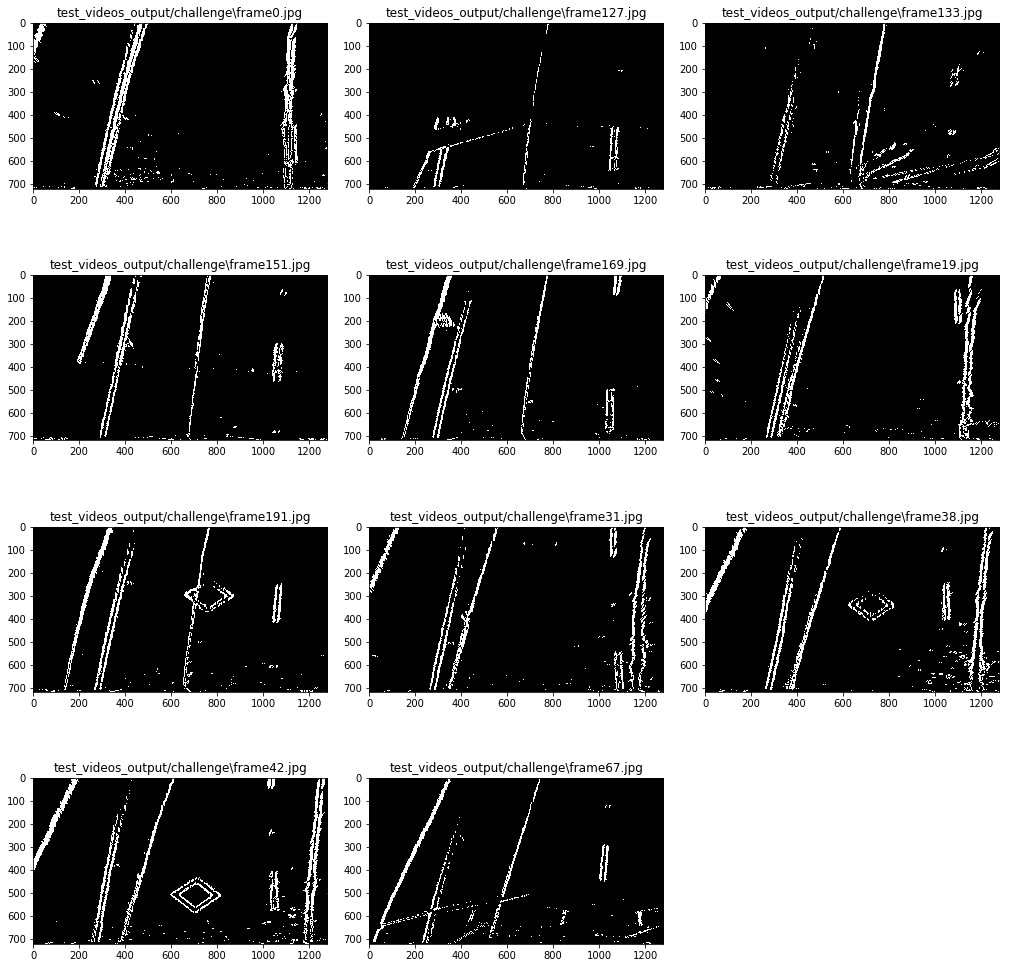

In [233]:
filted_binary = list(map(sobel_thresh, warp_images))

show_images(filted_binary,test_images_label)

## Find Lane

In [45]:
def show_histogram(images):
    cols = 3
    rows = (len(images)+cols-1)//cols 
    
    plt.figure(figsize=(20, 20))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        
        histogram = np.sum(image[image.shape[0]//4:,:], axis=0)
        plt.plot(histogram)
    
    plt.show()

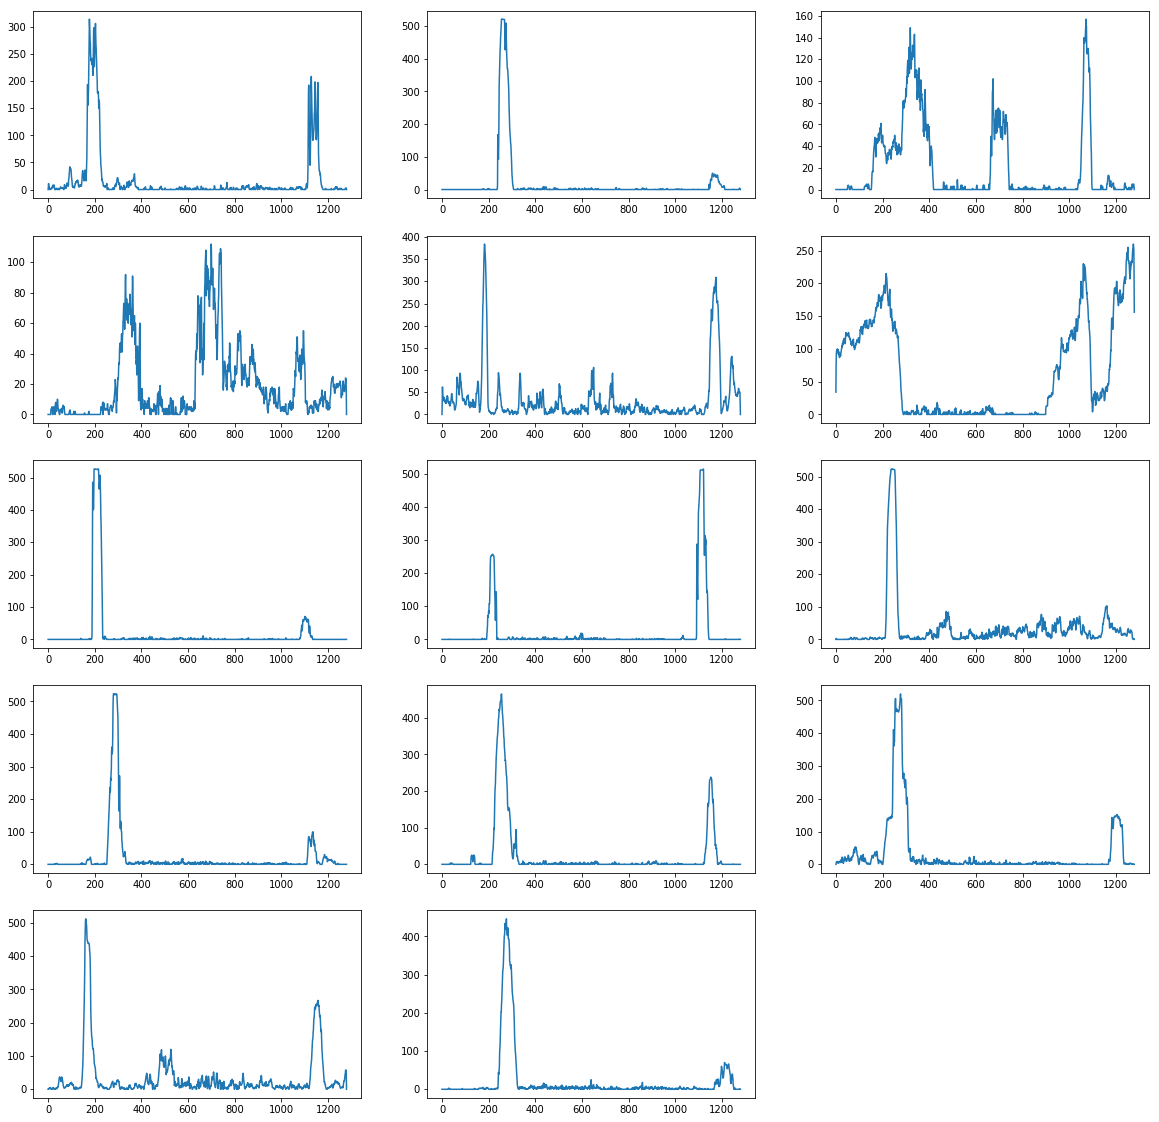

In [46]:
show_histogram(filted_binary)

In [47]:
def recognizelane(binary_warped,nwindows = 9,margin = 100,minpix = 50):
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//4:,:], axis=0)
    
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    
    leftstart = int(0.5*midpoint)
    rightstart = int(1.0*midpoint)
    
    leftx_base = np.argmax(histogram[:leftstart])
    rightx_base = np.argmax(histogram[rightstart:]) + rightstart

    # Choose the number of sliding windows
#     nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])


    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
#     margin = 100
    # Set minimum number of pixels found to recenter window
#     minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 4) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 4) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)

        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    if len(leftx) == 0 or len(rightx) == 0:
        return binary_warped,None,None
    
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
#     left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
#     right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    p_left = np.poly1d(left_fit)
    left_fitx = p_left(ploty)
    
    p_right = np.poly1d(right_fit)
    right_fitx = p_right(ploty)   
    
    left_line_pts = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    cv2.polylines(out_img, np.int_(left_line_pts), isClosed=False, color=(255,255,0), thickness=5)
        
    right_line_pts = np.array([np.transpose(np.vstack([right_fitx, ploty]))])
    cv2.polylines(out_img, np.int_(right_line_pts), isClosed=False, color=(255,255,0), thickness=5)
    
    return out_img,left_fit,right_fit

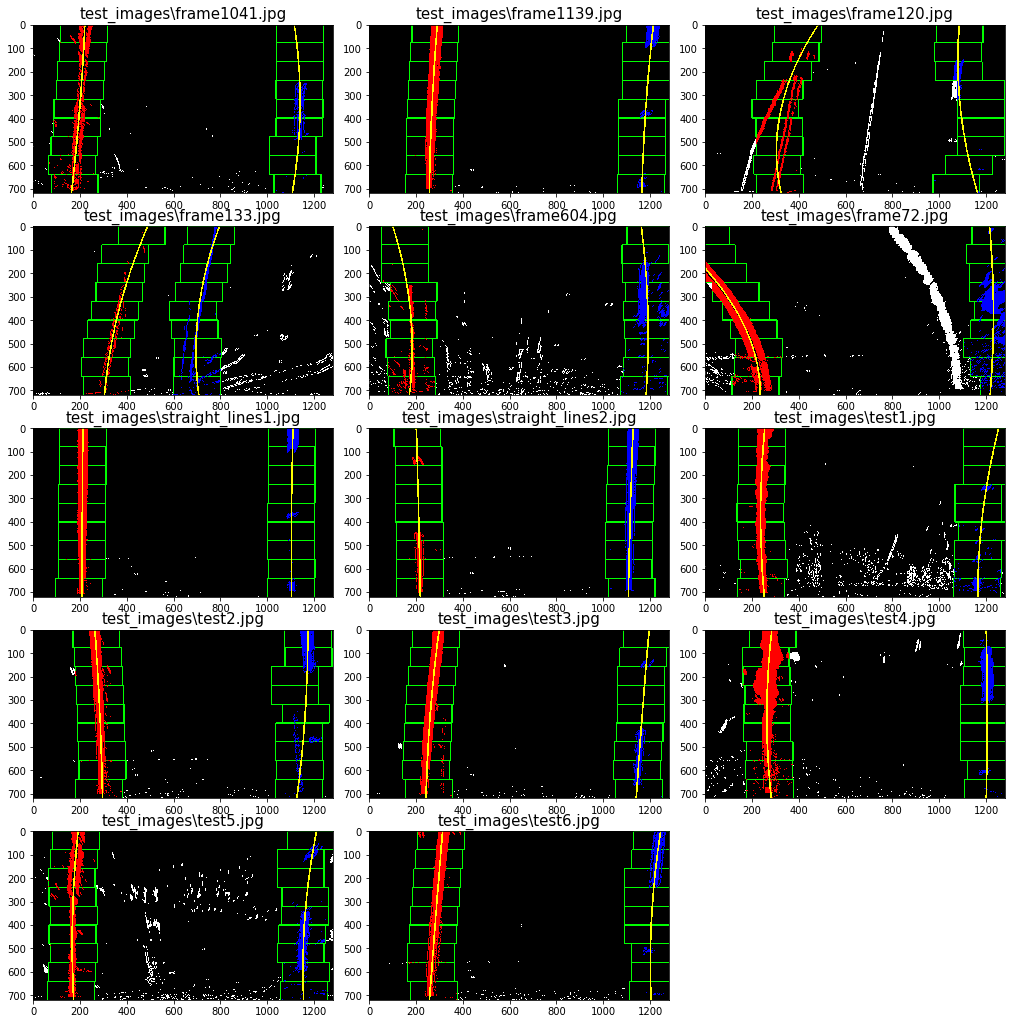

In [48]:
recogin_images = list(map(recognizelane, filted_binary))

fittedimge = [s[0] for s in recogin_images]
left_fit = [s[1] for s in recogin_images]
right_fit = [s[2] for s in recogin_images]

show_images(fittedimge,test_images_label)

In [23]:
def recognizefittedlane(binary_warped,left_fit,right_fit,nwindows = 9,margin = 100,minpix = 50):
    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    if len(leftx) == 0 or len(rightx) == 0:
        return binary_warped,None,None
    
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
#     left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
#     right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    p_left = np.poly1d(left_fit)
    left_fitx = p_left(ploty)
    
    p_right = np.poly1d(right_fit)
    right_fitx = p_right(ploty)   
    
        # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                                  ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                                  ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    
    left_line_pts = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    cv2.polylines(out_img, np.int_(left_line_pts), isClosed=False, color=(255,255,0), thickness=5)
        
    right_line_pts = np.array([np.transpose(np.vstack([right_fitx, ploty]))])
    cv2.polylines(out_img, np.int_(right_line_pts), isClosed=False, color=(255,255,0), thickness=5)
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    return result,left_fit,right_fit

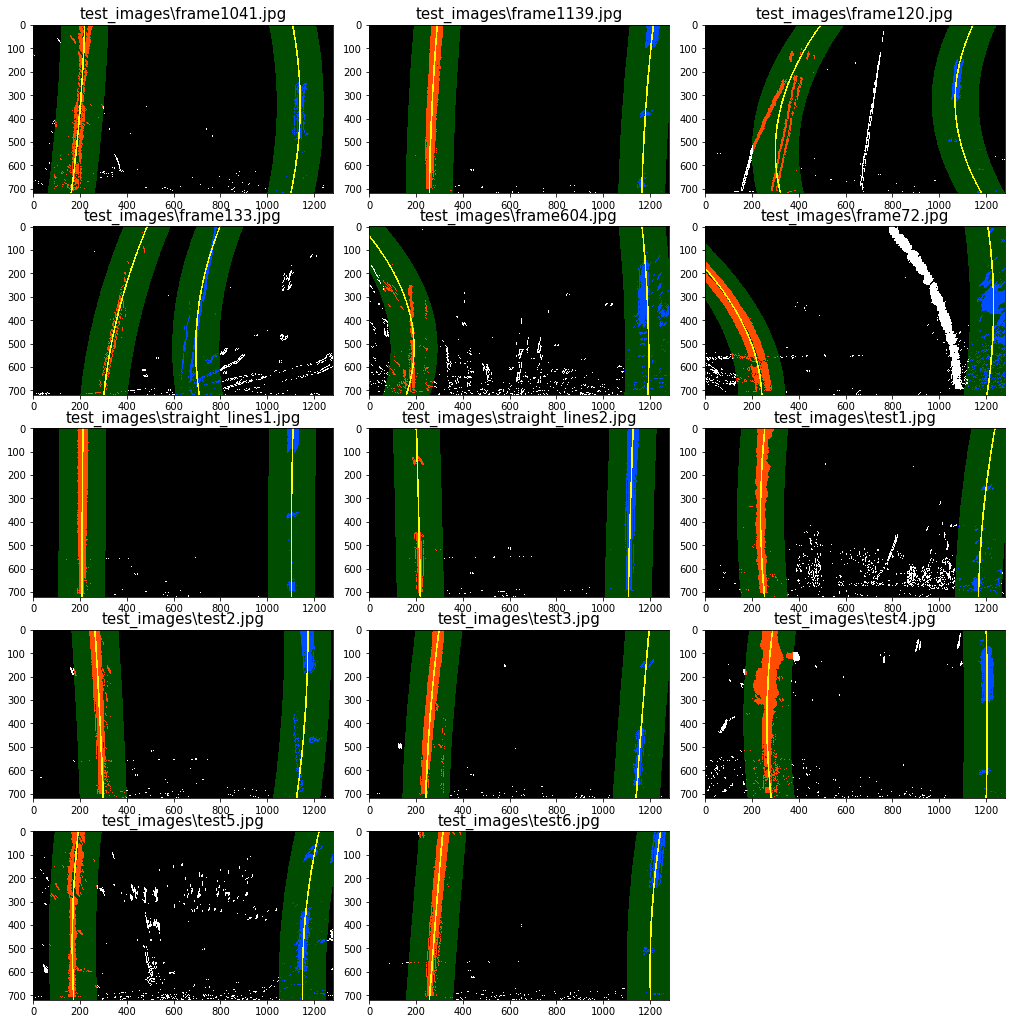

In [24]:
recogin_images = list(map(recognizefittedlane, filted_binary,left_fit,right_fit))

fittedimge = [s[0] for s in recogin_images]
left_fit = [s[1] for s in recogin_images]
right_fit = [s[2] for s in recogin_images]

show_images(fittedimge,test_images_label)

## Measure Lane Curvature

In [25]:
def measuringcurvature(binary_warped,left_fit,right_fit):
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    y_eval = np.max(ploty)
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    xoffset = ((np.mean(left_fitx)+np.mean(right_fitx))/2.0-640)*xm_per_pix
    # Now our radius of curvature is in meters
#     print('center offest:',xoffset, 'm')
#     print('left curvature:',left_curverad, 'm')
#     print('right curvature:',right_curverad, 'm')
    
    return xoffset,left_curverad,right_curverad

In [26]:
list(map(measuringcurvature, warp_images,left_fit,right_fit))

[(0.12069593938437832, 2464.4979391711586, 586.21190933514117),
 (0.46009615693468808, 3349.6312796901257, 2766.6540232016623),
 (0.45192600232456853, 244.28163455660658, 226.53333467258798),
 (-0.48276410376546752, 750.88136626179812, 428.85631601224952),
 (0.10682347523672979, 196.92169008051795, 1770.4701104859644),
 (0.10663763986064134, 216.22264306898688, 809.32572804695633),
 (0.091140482236496567, 36052.019946650871, 6897.3873611967219),
 (0.12361184352031286, 18094.150299014771, 15575.731594791552),
 (0.41199380427616056, 1232.0210499931472, 1504.4679309260084),
 (0.42481676261817675, 7831.2998602091766, 1630.5350021487561),
 (0.4004651154468778, 2367.1307970298767, 14749.43023119291),
 (0.51381332327327722, 990.26896043575596, 4249.010925761143),
 (0.17093503854879566, 1495.3399754893278, 920.4605777394554),
 (0.57468561895612713, 15113.860793297166, 1295.2853726011663)]

In [27]:
def unwarp(img,left_fit,right_fit,src=src,dst=dst):
    img_size = (img.shape[1],img.shape[0])
    
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    # Create an image to draw the lines on
#     warp_zero = np.zeros_like(warp_images[0]).astype(np.uint8)
#     color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    color_warp = np.zeros_like(img).astype(np.uint8)
    
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (img.shape[1], img.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(img, 1, newwarp, 0.3, 0)
    
    res = measuringcurvature(img,left_fit,right_fit)
    
    cv2.putText(result,'center offest:{:.2f}m'.format(res[0]),(10,60),cv2.FONT_HERSHEY_COMPLEX,2,(255,255,255),3)
    cv2.putText(result,'left curvature:{:.2f}m'.format(res[1]),(10,130),cv2.FONT_HERSHEY_COMPLEX,2,(255,255,255),3)
    cv2.putText(result,'right curvature:{:.2f}m'.format(res[2]),(10,200),cv2.FONT_HERSHEY_COMPLEX,2,(255,255,255),3)
    
#     plt.imshow(result)
    return result

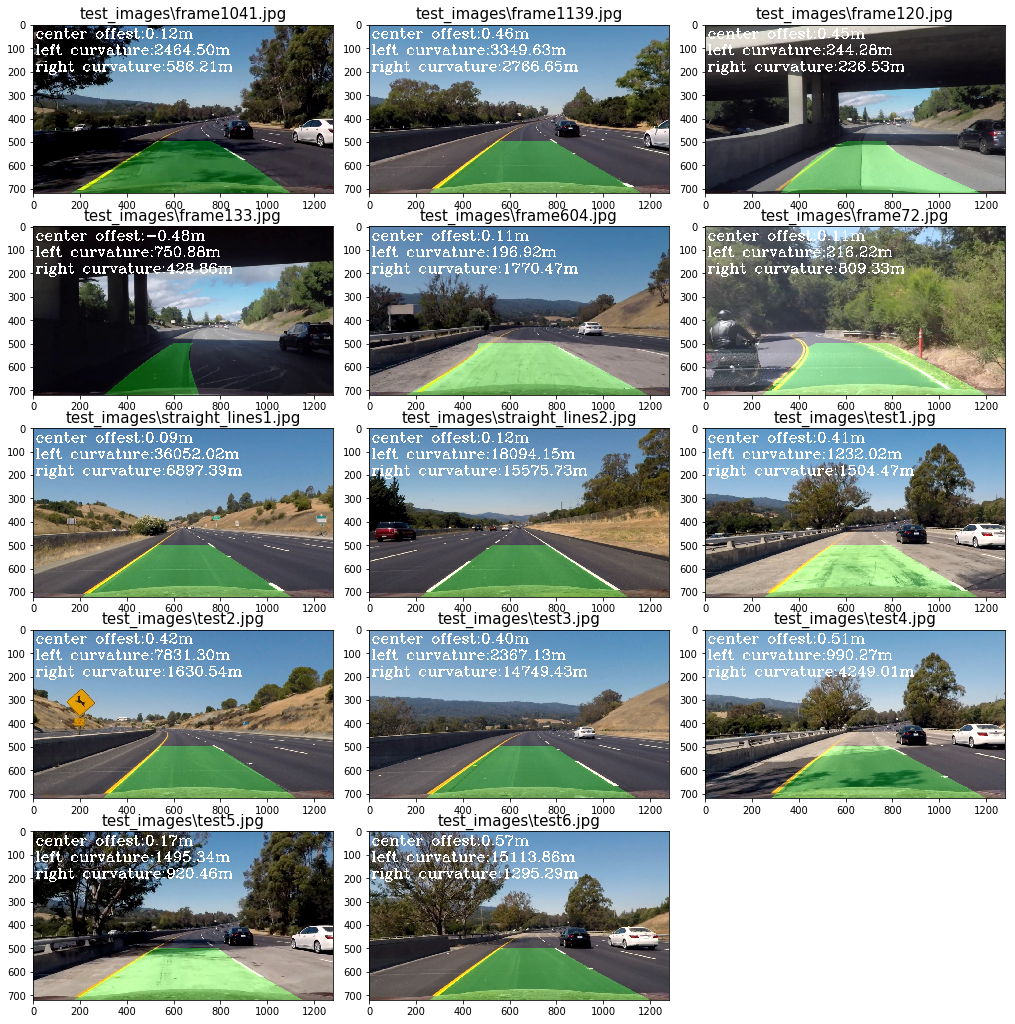

In [28]:
unwarp_images = list(map(unwarp, undistort_images,left_fit,right_fit))

show_images(unwarp_images,test_images_label)

In [154]:
def imageprocessshow(image, recent_leftfitted=None, recent_rightfitted=None, debugcombined = True,framenumber = None):
    
    undistort_images = imageundistort(image)
    
    warp_images = warp(undistort_images)
    
    pipe_images = pipeline(warp_images)
    
    if recent_leftfitted != None and recent_rightfitted != None:
        fittedimg,recent_leftfitted,recent_rightfitted = recognizefittedlane(pipe_images,\
                                                                                      recent_leftfitted,recent_rightfitted)
    else:
        fittedimg,recent_leftfitted,recent_rightfitted = recognizelane(pipe_images)
           
    unwarp_images = unwarp(undistort_images,recent_leftfitted,recent_rightfitted)
    
    if debugcombined == True:
        # Calculate the size of screens
        result_screen_w = unwarp_images.shape[1]
        result_screen_h = unwarp_images.shape[0]
        debug_screen_w = np.int(result_screen_w/3)
        debug_screen_h = np.int(result_screen_h/3)
        screen_w = result_screen_w + debug_screen_w
        screen_h = result_screen_h
        
        # Assign result image to the screen
        #show screen
        screen = np.zeros((screen_h,screen_w,3),dtype=np.uint8)
        
        if framenumber != None:
            cv2.putText(unwarp_images,'frame index:{:}'.format(framenumber),(10,270),cv2.FONT_HERSHEY_COMPLEX,2,(255,255,255),3)
        
        screen[0:result_screen_h,0:result_screen_w] = unwarp_images
        # Assign debug image to the screen
        debug_img_1 =warp_images
        screen[0:debug_screen_h,result_screen_w:,:] = cv2.resize(debug_img_1,(debug_screen_w,debug_screen_h))
        
        debug_img_2 = np.dstack((pipe_images,pipe_images,pipe_images))*255
        screen[debug_screen_h : debug_screen_h*2,result_screen_w:,:] =cv2.resize(debug_img_2,(debug_screen_w,debug_screen_h))
        
        debug_img_3 = fittedimg
        screen[debug_screen_h*2 : debug_screen_h*3,result_screen_w:,:] =cv2.resize(debug_img_3,(debug_screen_w,debug_screen_h))
        
        return screen,recent_leftfitted,recent_rightfitted
    else:
        return unwarp_images,recent_leftfitted,recent_rightfitted

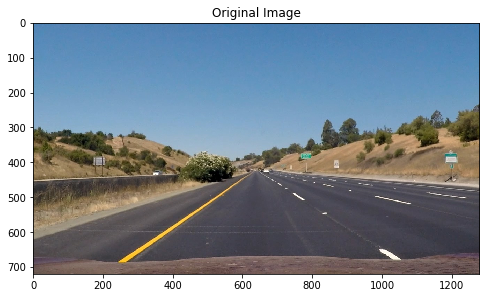

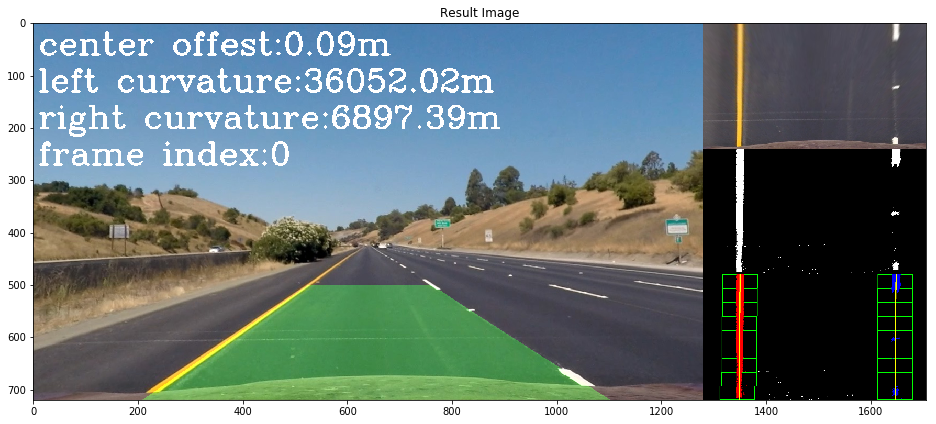

In [30]:
#reading in an image
straightimage = mpimg.imread('test_images/straight_lines1.jpg')

plt.figure(figsize=(8, 8))

plt.imshow(straightimage) 
plt.title('Original Image')

plt.figure(figsize=(16, 16))
warpstraightimage = imageprocessshow(straightimage,framenumber=0)
plt.imshow(warpstraightimage[0]) 
plt.title('Result Image')

## Line Class

In [31]:
from collections import deque

# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        
        self.recogin_images_left = deque(maxlen = 10)
        self.recogin_images_right = deque(maxlen = 10)
        
#         self.recent_leftfitted =  np.array([0,0,0], dtype='float') 
#         self.recent_rightfitted =  np.array([0,0,0], dtype='float') 

        self.recent_leftfitted =  None
        self.recent_rightfitted =  None

        self.leftdeparturecount =  0
        self.rightdeparturecount =  0
        
        self.framenumbercnt =  0
        
    def process(self, image):

                
        res,self.recent_leftfitted,self.recent_rightfitted = imageprocessshow(image,\
                                                                              self.recent_leftfitted,self.recent_rightfitted,\
                                                                              framenumber=self.framenumbercnt)
        self.recogin_images_left.append(self.recent_leftfitted)
        self.recogin_images_right.append(self.recent_rightfitted)   
        self.recent_leftfitted = np.mean(self.recogin_images_left,axis=0)
        self.recent_rightfitted = np.mean(self.recogin_images_right,axis=0)
        
        self.framenumbercnt += 1
            
        return res

In [ ]:
L1 = Line()

result = L1.process(straightimage)
print(L.recent_leftfitted)
plt.imshow(result) 

In [ ]:
from collections import deque

# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None
        
        self.recogin_images_left = deque(maxlen = 10)
        self.recogin_images_right = deque(maxlen = 10)
        
        self.recent_leftfitted =  np.array([0,0,0], dtype='float') 
        self.recent_rightfitted =  np.array([0,0,0], dtype='float') 
        
        self.leftdeparturecount =  0
        self.rightdeparturecount =  0
        
    def process(self, image):
        undistort_images = imageundistort(image)
        
        warp_images = warp(undistort_images)
        
        warp_images = pipeline(warp_images)
        
#         warp_images = noisereduce(warp_images)
        
        if self.leftdeparturecount >= 20 or self.rightdeparturecount >= 20:
            self.leftdeparturecount = 0
            self.rightdeparturecount = 0
            self.recogin_images_left.clear()
            self.recogin_images_right.clear()
            print("depture")
        
        if len(self.recogin_images_left) <= 5 or len(self.recogin_images_right) <= 5:
            temp_recogin_images_left,temp_recogin_images_right = recoginelane(warp_images,showplot=False)
        else:
            temp_recogin_images_left,temp_recogin_images_right = recoginefittedlane(warp_images,self.recent_leftfitted,\
                                                                                   self.recent_rightfitted,showplot=False)
        
        
        if temp_recogin_images_left == None or temp_recogin_images_right == None:
            self.detected = False  
        else:
            self.detected = True  
        
#         standard = np.std(temp_recogin_images_left - temp_recogin_images_right)
        
#         print(standard)
        
#         if standard > 400 or standard < 120:
#             self.detected = False 
#         if len(self.recogin_images_left) >= 3 and len(self.recogin_images_right) >= 3:
        
#             if self.detected == True :
#                 standard = np.std(temp_recogin_images_left - self.recent_leftfitted)
#                 if standard < 800:
#                     self.recogin_images_left.append(temp_recogin_images_left)

#                 standard = np.std(temp_recogin_images_right - self.recent_rightfitted)
#                 if standard < 800:
#                     self.recogin_images_right.append(temp_recogin_images_right)
#         else:
#             self.recogin_images_left.append(temp_recogin_images_left)
#             self.recogin_images_right.append(temp_recogin_images_right).
        
        if self.detected == True :
            if len(self.recogin_images_left) <= 3 or len(self.recogin_images_right) <= 3:
#                 standard = np.std(temp_recogin_images_left - temp_recogin_images_right)
#                 if standard < 500 and standard > 100:
                self.recogin_images_left.append(temp_recogin_images_left)
                self.recogin_images_right.append(temp_recogin_images_right)   
                self.recent_leftfitted = np.mean(self.recogin_images_left,axis=0)
                self.recent_rightfitted = np.mean(self.recogin_images_right,axis=0)
            else:
                self.recent_leftfitted = np.mean(self.recogin_images_left,axis=0)
                self.recent_rightfitted = np.mean(self.recogin_images_right,axis=0)
                
                standard = np.absolute(self.recent_leftfitted - temp_recogin_images_left)
                if standard[0] < 0.01 and standard[1] < 0.15 and standard[2] < 100:
                    self.recogin_images_left.append(temp_recogin_images_left)
                    self.recent_leftfitted  = np.mean(self.recogin_images_left,axis=0)
                    self.leftdeparturecount = 0
                else:
                    self.leftdeparturecount += 1

                standard = np.absolute(self.recent_rightfitted - temp_recogin_images_right)
                if standard[0] < 0.01 and standard[1] < 0.15 and standard[2] < 100:
                    self.recogin_images_right.append(temp_recogin_images_right) 
                    self.recent_rightfitted = np.mean(self.recogin_images_right,axis=0)
                    self.leftdeparturecount = 0
                else:
                    self.rightdeparturecount += 1
        else:
            self.leftdeparturecount += 1
            self.rightdeparturecount += 1

#         if self.detected == True :
#             self.recogin_images_left.append(temp_recogin_images_left)
#             self.recogin_images_right.append(temp_recogin_images_right)   
#             self.recent_leftfitted = np.mean(self.recogin_images_left,axis=0)
#             self.recent_rightfitted = np.mean(self.recogin_images_right,axis=0)
                
        unwarp_images = unwarp(undistort_images,self.recent_leftfitted,self.recent_rightfitted)
        
        return unwarp_images

## Test on Videos

In [32]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

## Test on Project Videos

In [33]:
project_output = 'test_videos_output/project_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
L = Line()
clip1 = VideoFileClip("test_videos/project_video.mp4")
white_clip = clip1.fl_image(L.process) #NOTE: this function expects color images!!
%time white_clip.write_videofile(project_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/project_video_output.mp4
[MoviePy] Writing video test_videos_output/project_video_output.mp4


100%|█████████▉| 1260/1261 [02:29<00:00,  8.40it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/project_video_output.mp4 

Wall time: 2min 30s


In [34]:
HTML("""
<video width="960" height="450" controls>
  <source src="{0}">
</video>
""".format(project_output))

## Test on challenge Videos

In [35]:
challenge_source = "test_videos/challenge_video.mp4"
challenge_output = 'test_videos_output/challenge_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip(challenge_source)
L = Line()
white_clip = clip1.fl_image(L.process) #NOTE: this function expects color images!!
%time white_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/challenge_video_output.mp4
[MoviePy] Writing video test_videos_output/challenge_video_output.mp4


100%|██████████| 485/485 [00:57<00:00,  8.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge_video_output.mp4 

Wall time: 58.5 s


In [36]:
HTML("""
<video width="960" height="450" controls>
  <source src="{0}">
</video>
""".format(challenge_output))

## Test on harder challenge Videos

In [ ]:
harder_challenge_source = "test_videos/harder_challenge_video.mp4"
harder_challenge_output = 'test_videos_output/harder_challenge_video_output.mp4'

## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
L = Line()
clip1 = VideoFileClip(harder_challenge_source)
white_clip = clip1.fl_image(L.process) #NOTE: this function expects color images!!
%time white_clip.write_videofile(harder_challenge_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="450" controls>
  <source src="{0}">
</video>
""".format(harder_challenge_output))

## Extract images from Videos

In [ ]:
challenge_source = "test_videos/challenge_video.mp4"
challenge_output = 'test_videos_output/challenge_video_output.mp4'

harder_challenge_source = "test_videos/harder_challenge_video.mp4"
harder_challenge_output = 'test_videos_output/harder_challenge_video_output.mp4'

cap = cv2.VideoCapture(harder_challenge_source)

count = 0

while True:
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('video', frame)
        cv2.imwrite("test_videos_output/harder_challenge_video_output/frame%d.jpg"%count,frame)
        count += 1
    if cv2.waitKey(1) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows() 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2

# Read in a thresholded image
warped = warp_images[0]
# window settings
window_width = 50 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 100 # How much to slide left and right for searching

def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

def find_window_centroids(image, window_width, window_height, margin):
    
    window_centroids = [] # Store the (left,right) window centroid positions per level
    window = np.ones(window_width) # Create our window template that we will use for convolutions
    
    # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
    # and then np.convolve the vertical image slice with the window template 
    
    # Sum quarter bottom of image to get slice, could use a different ratio
    l_sum = np.sum(warped[int(3*warped.shape[0]/4):,:int(warped.shape[1]/2)], axis=0)
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    r_sum = np.sum(warped[int(3*warped.shape[0]/4):,int(warped.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(warped.shape[1]/2)
    
    # Add what we found for the first layer
    window_centroids.append((l_center,r_center))
    
    # Go through each layer looking for max pixel locations
    for level in range(1,(int)(warped.shape[0]/window_height)):
        # convolve the window into the vertical slice of the image
        image_layer = np.sum(warped[int(warped.shape[0]-(level+1)*window_height):int(warped.shape[0]-level*window_height),:], axis=0)
        conv_signal = np.convolve(window, image_layer)
        # Find the best left centroid by using past left center as a reference
        # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
        offset = window_width/2
        l_min_index = int(max(l_center+offset-margin,0))
        l_max_index = int(min(l_center+offset+margin,warped.shape[1]))
        l_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset
        # Find the best right centroid by using past right center as a reference
        r_min_index = int(max(r_center+offset-margin,0))
        r_max_index = int(min(r_center+offset+margin,warped.shape[1]))
        r_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
        # Add what we found for that layer
        window_centroids.append((l_center,r_center))

    return window_centroids

window_centroids = find_window_centroids(warped, window_width, window_height, margin)

# If we found any window centers
if len(window_centroids) > 0:

    # Points used to draw all the left and right windows
    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)

    # Go through each level and draw the windows 	
    for level in range(0,len(window_centroids)):
        # Window_mask is a function to draw window areas
        l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
        r_mask = window_mask(window_width,window_height,warped,window_centroids[level][1],level)
        # Add graphic points from window mask here to total pixels found 
        l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
        r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

    # Draw the results
    template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
    zero_channel = np.zeros_like(template) # create a zero color channel
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
    warpage = np.array(cv2.merge((warped,warped,warped)),np.uint8) # making the original road pixels 3 color channels
    output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results

    # If no window centers found, just display orginal road image
else:
    output = np.array(cv2.merge((warped,warped,warped)),np.uint8)

# Display the final results
plt.imshow(output)
plt.title('window fitting results')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


# Fit a second order polynomial to pixel positions in each fake lane line
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images

In [ ]:
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)
# Example values: 1926.74 1908.48

In [ ]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

In [ ]:
def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

def find_window_centroids(warped, window_width, window_height, margin):
    
    window_centroids = [] # Store the (left,right) window centroid positions per level
    window = np.ones(window_width) # Create our window template that we will use for convolutions
    
    # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
    # and then np.convolve the vertical image slice with the window template 
    
    # Sum quarter bottom of image to get slice, could use a different ratio
    l_sum = np.sum(warped[int(3*warped.shape[0]/4):,:int(warped.shape[1]/2)], axis=0)
    l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
    r_sum = np.sum(warped[int(3*warped.shape[0]/4):,int(warped.shape[1]/2):], axis=0)
    r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(warped.shape[1]/2)
    
    histogram = np.sum(warped[warped.shape[0]//4:,:], axis=0)
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    
    l_center += leftx_base
    r_center += rightx_base
    
    l_center = l_center/2.0
    r_center = r_center/2.0
    # Add what we found for the first layer
    window_centroids.append((l_center,r_center))
    
    # Go through each layer looking for max pixel locations
    for level in range(1,(int)(warped.shape[0]/window_height)):
        # convolve the window into the vertical slice of the image
        image_layer = np.sum(warped[int(warped.shape[0]-(level+1)*window_height):int(warped.shape[0]-level*window_height),:], axis=0)
        conv_signal = np.convolve(window, image_layer)
        # Find the best left centroid by using past left center as a reference
        # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
        offset = window_width/2
        l_min_index = int(max(l_center+offset-margin,0))
        l_max_index = int(min(l_center+offset+margin,warped.shape[1]))
        tl_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset
        if max(conv_signal[l_min_index:l_max_index]) != 0:
            l_center = tl_center
        # Find the best right centroid by using past right center as a reference
        r_min_index = int(max(r_center+offset-margin,0))
        r_max_index = int(min(r_center+offset+margin,warped.shape[1]))
        tr_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
        if max(conv_signal[r_min_index:r_max_index]) != 0:
            r_center = tr_center
        # Add what we found for that layer
        window_centroids.append((l_center,r_center))

    return window_centroids


def slidesearchlane(binary_warped,nwindows = 9,margin = 100,minpix = 50,showplot=True):
    # window settings
    window_width = 50 
    window_height = 80 # Break image into 9 vertical layers since image height is 720
    
    window_centroids = find_window_centroids(binary_warped, window_width, window_height, margin)
    
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    

    # If we found any window centers
    if len(window_centroids) > 0:

        # Points used to draw all the left and right windows
        l_points = np.zeros_like(binary_warped)
        r_points = np.zeros_like(binary_warped)

        # Go through each level and draw the windows 	
        for level in range(0,len(window_centroids)):
            # Window_mask is a function to draw window areas
            l_mask = window_mask(window_width,window_height,binary_warped,window_centroids[level][0],level)
            r_mask = window_mask(window_width,window_height,binary_warped,window_centroids[level][1],level)
            # Add graphic points from window mask here to total pixels found 
            l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
            r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255
            
        lnonzero = l_points.nonzero()
        lefty = np.array(lnonzero[0])
        leftx = np.array(lnonzero[1])
        
        rnonzero = r_points.nonzero()
        righty = np.array(rnonzero[0])
        rightx = np.array(rnonzero[1])
        
        out_img[lefty, leftx] = [255, 0, 0]
        out_img[righty,rightx] = [0, 0, 255]

        # Fit a second order polynomial to each
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)

        # Generate x and y values for plotting
        ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    if showplot == True:
        # Display the final results
        plt.imshow(out_img)
        plt.title('window fitting results')

        plt.plot(left_fitx, ploty, color='yellow')
        plt.plot(right_fitx, ploty, color='yellow')
        plt.xlim(0, 1280)
        plt.ylim(720, 0)
        plt.show()
    return left_fit,right_fit